<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Highlights" data-toc-modified-id="Highlights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Highlights</a></span><ul class="toc-item"><li><span><a href="#Highlights:-A-few-high-level-examples" data-toc-modified-id="Highlights:-A-few-high-level-examples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Highlights: A few high level examples</a></span></li><li><span><a href="#Why-not-do-decorators-&quot;the-normal-way&quot;?" data-toc-modified-id="Why-not-do-decorators-&quot;the-normal-way&quot;?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why not do decorators "the normal way"?</a></span><ul class="toc-item"><li><span><a href="#Closures-don't-pickle" data-toc-modified-id="Closures-don't-pickle-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Closures don't pickle</a></span></li><li><span><a href="#Make-Frequent-patterns-easy-(and-correct)" data-toc-modified-id="Make-Frequent-patterns-easy-(and-correct)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Make Frequent patterns easy (and correct)</a></span></li></ul></li><li><span><a href="#The-Wrap-class" data-toc-modified-id="The-Wrap-class-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The <code>Wrap</code> class</a></span></li><li><span><a href="#The-Ingress-class" data-toc-modified-id="The-Ingress-class-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The <code>Ingress</code> class</a></span></li></ul></li><li><span><a href="#Real-world-examples" data-toc-modified-id="Real-world-examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Real-world examples</a></span><ul class="toc-item"><li><span><a href="#parameter-subsets-and-reordering" data-toc-modified-id="parameter-subsets-and-reordering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>parameter subsets and reordering</a></span></li></ul></li><li><span><a href="#Scrap" data-toc-modified-id="Scrap-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scrap</a></span><ul class="toc-item"><li><span><a href="#grouping-nodes-in-graphviz-graphs" data-toc-modified-id="grouping-nodes-in-graphviz-graphs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>grouping nodes in graphviz graphs</a></span></li><li><span><a href="#graphs" data-toc-modified-id="graphs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>graphs</a></span></li></ul></li></ul></div>

# Highlights

* Highlights: A few high level examples
* Why not do decorators "the normal way"?
    * Make Frequent patterns easy (and correct)
    * Build a components+combinators framework for wrappers
    * Closures don't pickle
* The `Wrap` class
* The `Ingress` class

## Highlights: A few high level examples

In [1]:
def f(w, /, x: float, y=2, *, z: int = 3):
    """Has 3 kinds & every of the 4 combinations of (default y/n, annotated y/n)
    >>> formula2(0, 1, 2)
    '(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'
    """
    return f"(w:={w}) + (x:={x}) * (y:={y}) ** (z:={z}) == {w + x * y ** z}"

In [2]:
from functools import wraps, partial

def add_log(func=None, *, logger=print):
    if func is None:
        return partial(add_log, logger=logger)
    else:
        @wraps(func)
        def _func(*args, **kwargs):
            func_name = getattr(func, '__name__', '')
            logger(func_name, args, kwargs)
            return func(*args, **kwargs)
        return _func

# from i2.wrapper import wrap, double_up_as_factory
# def log_ingress(*args, **kwargs):
#
#     return args, kwargs
#     func_name = getattr(func, '__name__', '')
#
# @double_up_as_factory
# def add_log(func=None, *, logger=print):
#

In [3]:
######################################################################
# You can just be quick and...

@add_log
def f(a, b=3):
    return a + b

f(10, b=42)

######################################################################
# You can also specify a different logger

def more_involved_logger(func_name, args, kwargs, log_call=print):
    args_str = ', '.join(map(str, args))
    kwargs_str = ', '.join(map(lambda kv: f"{kv[0]}={kv[1]}", kwargs.items()))
    log_call(f"{func_name}({args_str}, {kwargs_str})")

@add_log(logger=more_involved_logger)
def f(a, b=3):
    return a + b

f(10, b=42)

######################################################################
# you can also use like this

def f(a, b=3):
    return a + b

f = add_log(f, logger=more_involved_logger)

f(10, b=42)

######################################################################
# and you can pickle!

import pickle

unpickled_f = pickle.loads(pickle.dumps(f))

unpickled_f(10, b=42)

f (10,) {'b': 42}
f(10, b=42)
f(10, b=42)
f(10, b=42)


52

## Why not do decorators "the normal way"?

If you don't need to pickle things (say to persist or use multiprocessing), 
and your case is very particular (so you don't think -- or don't care -- that there's 
anything reusable there), than fine: Use decorators "the normal way". 
By "the normal way" I mean the way python books usually teach them. 
[Here's an example tutorial](https://realpython.com/primer-on-python-decorators/)

But that way has problems. Don't take it from me, and I won't explain further, 
[this guy](https://hynek.me/articles/decorators/) will. 

Here, we're not focused the problems mentioned in that last article, but in two ones in particular:
* pickability (we'd like to wrap objects so that we don't break their capability of being pickled
* MORE IMPORTANTLY: We're interested in developing "wrapper tooling" -- that is, making frequent 
    wrapping patterns easy to get, consistent, and correct. 


### Closures don't pickle

In [4]:
# TODO: Show this

### Make Frequent patterns easy (and correct)

TODO: Give examples

## The `Wrap` class

In [5]:
import i2.wrapper
ddir = lambda o: list(x for x in dir(o) if not x.startswith('__'))
ddir(i2.wrapper)

['ArgNameMappingIngress',
 'ArgValConverterIngress',
 'Callable',
 'Ingress',
 'InnerKwargs',
 'InnerMapIngress',
 'Iterable',
 'KwargsTrans',
 'Mapping',
 'MethodFunc',
 'MethodType',
 'Optional',
 'OuterKwargs',
 'Parameter',
 'Pipe',
 'Sig',
 'Wrap',
 '_alt_convert_dict_values',
 '_handle_ingress_class_inputs',
 'append_empty_args',
 'arg_val_converter',
 'arg_val_converter_ingress',
 'camelize',
 'convert_dict_values',
 'double_up_as_factory',
 'empty',
 'func_to_method_func',
 'identity',
 'invert_map',
 'items_with_mapped_keys',
 'kwargs_trans_to_extract_args_from_attrs',
 'make_dataclass',
 'make_funcs_binding_class',
 'mk_ingress_from_name_mapper',
 'nice_kinds',
 'param_to_dataclass_field_tuple',
 'parameter_to_dict',
 'parameters_to_dict',
 'partial',
 'signature',
 'transparent_egress',
 'transparent_ingress',
 'wrap',
 'wraps']

## The `Ingress` class

In [6]:
from i2.wrapper import Ingress, wrap, Wrap
from inspect import signature
from i2.wrapper import InnerMapIngress

Ingress = InnerMapIngress

def f(w, /, x: float, y=2, *, z: int = 3):
    """Has 3 kinds & every of the 4 combinations of (default y/n, annotated y/n)
    >>> formula2(0, 1, 2)
    '(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'
    """
    return f"(w:={w}) + (x:={x}) * (y:={y}) ** (z:={z}) == {w + x * y ** z}"


In [7]:
f(0, 1)

'(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'

Let's say you wanted to dispatch this function to a command line interface, or a webservice
where all arguments are taken from the url.
The problem here is that this means that all incoming values will be strings in that case.
Say you wanted all input values to be cast to ints.
In that case you could do:

In [8]:
trans_all_vals_to_ints = lambda d: {k: int(v) for k, v in d.items()}

cli_f = wrap(
    f,
    ingress=Ingress(signature(f), kwargs_trans=trans_all_vals_to_ints)
)

cli_f("2", "3", "4")

'(w:=2) + (x:=3) * (y:=4) ** (z:=3) == 194'

In a more realistic situation, you'd want to have more control over this value transformation.

Say you wanted to convert to int if it's possible, try float if not, and just leave the string
alone otherwise.

In [9]:
def _try_casting_to_numeric(x):
    try:
        return int(x)
    except ValueError:
        try:
            return float(x)
        except ValueError:
            return x

def cast_numbers(d: dict):
    return {k: _try_casting_to_numeric(v) for k, v in d.items()}


cli_f = wrap(
    f,
    ingress=Ingress(signature(f), kwargs_trans=cast_numbers)
)

cli_f("2", "3.14", "4")

'(w:=2) + (x:=3.14) * (y:=4) ** (z:=3) == 202.96'

In [10]:
def kwargs_trans(outer_kw):
    """
    Example of a kwargs_trans with a 1-to-many and a many-to-1 transformation
      w   x   y
     / \   \ /
    w   x   y
    """
    return dict(
        # e.g. 1-to-many: one outer arg (w) producing two inner args (w, and x)
        w=outer_kw['w'] * 2,
        x=outer_kw['w'] * 3,
        # e.g. many-to-1: two outer args (x and y) producing one inner arg (y)
        y=outer_kw['x'] + outer_kw['y'],
        # Note that no z is mentioned: This means we're just leaving it alone
    )


ingress = Ingress(signature(f), kwargs_trans=kwargs_trans)
assert ingress(2, x=3, y=4) == ((4,), {'x': 6, 'y': 7, 'z': 3})

wrapped_f = wrap(f, ingress)
assert wrapped_f(2, x=3, y=4) == '(w:=4) + (x:=6) * (y:=7) ** (z:=3) == 2062'


The following is an example that involves several aspects of the `Ingress` class.

In [11]:
from i2 import Sig
from i2.wrapper import Ingress

def kwargs_trans(outer_kw):
    return dict(
        w=outer_kw['w'] * 2,
        x=outer_kw['w'] * 3,
        # need to pop you (inner func has no you argument)
        y=outer_kw['x'] + outer_kw.pop('you'),
        # Note that no z is mentioned: This means we're just leaving it alone
    )

ingress = Ingress(
    inner_sig=signature(f),
    kwargs_trans=kwargs_trans,
    outer_sig=Sig(f).ch_names(y='you')  # need to give the outer sig a you
    # You could also express it this way (though you'd loose the annotations)
    # outer_sig=lambda w, /, x, you=2, *, z=3: None
)
assert ingress(2, x=3, you=4) == ((4,), {'x': 6, 'y': 7, 'z': 3})

wrapped_f = wrap(f, ingress)
assert wrapped_f(2, x=3, you=4) == '(w:=4) + (x:=6) * (y:=7) ** (z:=3) == 2062'

In [12]:
Sig(f).ch_names(y='you')

<Sig (w, /, x: float, you=2, *, z: int = 3)>

In [13]:
ingress.outer_sig

<Sig (w, /, x: float, you=2, *, z: int = 3)>

In [14]:
signature(f)

<Signature (w, /, x: float, y=2, *, z: int = 3)>

In [15]:
Sig(f).ch_names(y='you')

<Sig (w, /, x: float, you=2, *, z: int = 3)>

A class to help build ingresses systematically by mapping the inner signature.

*Systematically*, i.e. "according to a fixed plan/system" is what it's about
here. As we'll see below, if you need to write a particular adapter for a
specific

- `inner_sig`: The signature of the wrapped function.
- `_allow_reordering`: Whether we want to allow reordering of variables
- `changes_for_name`: The `inner_name=dict_of_changes_for_that_name` pairs,
the `dict_of_changes_for_that_name` is a `dict` with keys being valid
`inspect.Parameter`


Consider the following function that has a position only, a keyword only,
two arguments with annotations, and three with a default.

In [16]:
def f(w, /, x: float = 1, y=2, *, z: int = 3):
    return w + x * y ** z

Say we wanted a version of this function

- that didn't have the argument kind restrinctions (all POSITION_OR_KEYWORD),

- where the annotation of ``x`` was changed ``int`` and the default removed

- where `y` was named `you` instead, and has an annotation (`int`).

- where the default of ``z`` was ``10`` instead of ``3``, and doesn't have an
annotation.

In order to get a version of this function we wanted (more lenient kinds,
with some annotations and a default change), we used the ingress function:


In [17]:
def directly_defined_ingress(w, x: int, you: int = 2, z=10):
    return (w,), dict(x=x, y=you, z=z)

When we need to wrap a specific function in a specific way, defining an ingress
function  this way is usually the simplest way.
But in some cases we need to build the ingress function using some predefined
rule/protocol to make applying rule/protocol systematic.

For those cases, ``InnerMapIngress`` comes in handy.

With `InnerMapIngress` we'd build our ingress function like this:

In [18]:
from inspect import Parameter, signature
from i2.wrapper import InnerMapIngress

PK = Parameter.POSITIONAL_OR_KEYWORD
empty = Parameter.empty
ingress = InnerMapIngress(
    f,
    # change kind to PK:
    w=dict(kind=PK),
    # change annotation of x from float to int and remove default
    x=dict(annotation=int, default=empty),
    # rename y to you and add annotation int:
    y=dict(name='you', annotation=int),
    # change kind to PK, default to 10, and remove annotation:
    z=dict(kind=PK, default=10, annotation=empty),
)

Note:

- Only the changes we wish to make to the parameters are mentioned.
You could also define the parameters explicitly by simply listing all three
of the dimensions (kind, annotation, and default)

- Three? But a `Parameter` object has four; what about the name?
Indeed, you can use name as well, more on that later.

- Note that in order to specify that you want no default, or no annotation,
you cannot use `None` since `None` is both a valid default and a valid
annotation; So instead you need to use `Parameter.empty` (conveniently assigned
to a constant named `empty` in the `wrapping` module.

Now see that all arguments are `POSITIONAL_OR_KEYWORD`, `x` and `y` are `int`,
and default of `z` is 10:

In [19]:
assert (
        str(signature(ingress))
        == str(signature(directly_defined_ingress))
        == '(w, x: int, you: int = 2, z=10)'
)

Additionally, `ingress` function does it's job of dispatching the right args
and kwargs to the target function:

In [20]:
assert (
        ingress(0, 1, 2, 3)
        == directly_defined_ingress(0, 1, 2, 3)
        == ((0,), {'x': 1, 'y': 2, 'z': 3})
)

In [47]:
def w(f):
    def _f(*args, **kwargs):
        print(args, kwargs)
        return f(*args, **kwargs)
    return _f


def foo(x):
    return x * 10

w_foo = w(foo)
w_foo(3)

(3,) {}


30

In [54]:
from tested import validate_codec
import dill
validate_codec(w_foo, dill.dumps, dill.loads)

True

In [ ]:
# Real-world examples

In [25]:
def f(w, /, x: float, y=2, *, z: int = 3):
    """Has 3 kinds & every of the 4 combinations of (default y/n, annotated y/n)
    >>> formula2(0, 1, 2)
    '(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'
    """
    return f"(w:={w}) + (x:={x}) * (y:={y}) ** (z:={z}) == {w + x * y ** z}"

## parameter subsets and reordering

In [38]:
from i2.wrapper import Ingress, Wrap, wrap
from i2 import Sig

def include_exclude_ingress_factory(func, include=None, exclude=None):
    """A pattern underlying any ingress that takes a subset of parameters (possibly reordering them).
    For example: Keep only required arguments, or reorder params to be able to 
    partialize #3 (without having to partialize #1 and #2)
    Note: A more general version would allow include and exclude to be expressed as functions 
    that apply to one or several properties of the params (name, kind, default, annotation).
    """
    sig = Sig(func)
    exclude = exclude or set()
    include = [x for x in (include or sig.names) if x not in exclude]
    
    return Ingress(
        inner_sig=sig,
        outer_sig=sig[include]
    )


In [39]:
def ff(w, x: float, y=2, z: int = 3):
    return f"(w:={w}) + (x:={x}) * (y:={y}) ** (z:={z}) == {w + x * y ** z}"

ing = include_exclude_ingress_factory(ff, include=['x', 'w'])
ing(1, 2)

((), {'w': 2, 'x': 1, 'y': 2, 'z': 3})

In [41]:
from i2.wrapper import MakeFromFunc
x_then_w_ingress_factory = partial(include_exclude_ingress_factory, include=['x', 'w'])

wrapped_ff = wrap(ff, ingress=MakeFromFunc(x_then_w_ingress_factory))
Sig(wrapped_ff)

<Sig (func)>

In [42]:
wrapped_ff = wrap(ff, ingress=x_then_w_ingress_factory(ff))

In [43]:
def keep_only_required(func):
    sig = Sig(func)
    include = [x for x in sig.names if x not in sig.defaults]
    return partial(include_exclude_ingress_factory, include=include)
#     return include_exclude_ingress_factory(func, include=include)

In [44]:
keep_only_required_wrap = partial(wrap, ingress=MakeFromFunc(keep_only_required))
wrapped_ff = keep_only_required_wrap(ff)
Sig(wrapped_ff)
wrap(ff, ingress=MakeFromFunc(keep_only_required))

In [45]:
Sig(keep_only_required(ff))

<Sig (func, *, include=['w', 'x'], exclude=None)>

In [88]:
new_sig = sig.ch_annotations(**{name: str for name in sig.names})
new_sig

<Sig (w: str, x: str, y: str = 2, z: str = 3)>

In [134]:
', '.join(map(str, [list, filter]))

"<class 'list'>, <class 'filter'>"

In [ ]:
def f(a, b):
    return a + b

def g(a_plus_b, b):
    return a_plus_b * d

In [8]:
from lined import Line #, LineParametrized
from i2 import Sig

Sig(LineParametrized)


LineParametrized(*value, sep=' ', end='\n', file=<ipykernel.iostream.OutStream object at 0x10b1ad190>, flush=False)

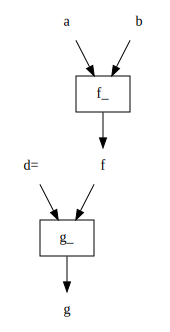

In [15]:
# def make_line(*funcs):
#     # make it with DAG
#     # --> boils down to making the FuncNodes
#     func_nodes = [
#         FuncNode(func, out=f"_{i}", bind={f"_{i}": f"_{i + 1}"}) for i, func in enumerate(funcs, 1)
#     ]
#     return func_nodes


def f(a, b):
    return a + b

def g(f, d=2):
    return a_plus_b * d


DAG((f, g)).dot_digraph()

# Scrap

In [127]:
def f(x: list) -> float:
    return np.mean(x)

def chunks(x: list, chk_size=2):
    yield from zip(*[iter(x)] * chk_size)
    
def expected_wrapped_f(x: list):
    return [f(chk) for chk in chunks(x)]

x = [1, 2, 3, 4]
assert f(x) == 2.5
assert expected_wrapped_f(x) == [1.5, 3.5]

In [131]:
from i2 import Pipe
t = Pipe(partial(map, f), list)
list(t(x))

[1.0, 2.0, 3.0, 4.0]

## grouping nodes in graphviz graphs

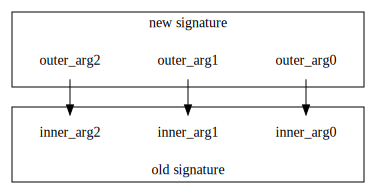

In [26]:
from graphviz import Source


Source("""
digraph G {
	subgraph cluster_0 {
        node [style=filled, color=white];
        outer_arg0, outer_arg1, outer_arg2
		label = "new signature";
	}
    
	subgraph cluster_1 {
        node [style=filled, color=white];
        inner_arg0, inner_arg1, inner_arg2
		label = "old signature";
        labelloc="b"
	}

    outer_arg0 -> inner_arg0
    outer_arg1 -> inner_arg1
    outer_arg2 -> inner_arg2
}
""")

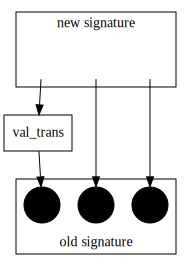

In [41]:
from graphviz import Source


Source("""
digraph G {
	subgraph cluster_0 {
        node [label="" shape=circle style=filled color=white];
        node [style=filled, color=white];
        outer_arg0, outer_arg1, outer_arg2
		label = "new signature";
	}
    
	subgraph cluster_1 {
        node [label="" shape=circle style=filled color=black];
        inner_arg0, inner_arg1, inner_arg2
		label = "old signature";
        labelloc="b"
	}

    outer_arg0 -> val_trans -> inner_arg0
    val_trans [shape="box"]
    outer_arg1 -> inner_arg1
    outer_arg2 -> inner_arg2
    
    inner_arg2 [label="" shape="circle" style="filled" color=black]
}

""")

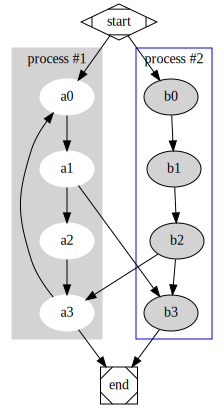

In [19]:
from graphviz import Source


Source("""
digraph G {

	subgraph cluster_0 {
		style=filled;
		color=lightgrey;
		node [style=filled,color=white];
		a0 -> a1 -> a2 -> a3;
		label = "process #1";
	}

	subgraph cluster_1 {
		node [style=filled];
		b0 -> b1 -> b2 -> b3;
		label = "process #2";
		color=blue
	}
	start -> a0;
	start -> b0;
	a1 -> b3;
	b2 -> a3;
	a3 -> a0;
	a3 -> end;
	b3 -> end;

	start [shape=Mdiamond];
	end [shape=Msquare];
}
""")

## graphs

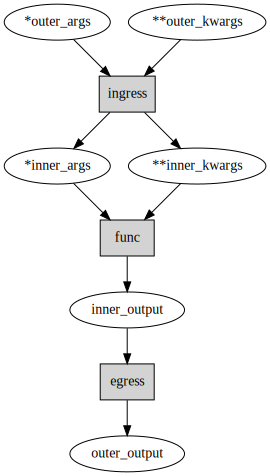

In [9]:
from qo import dgdisp, dot_to_ascii
from i2 import Pipe
from graphviz import Source

variable_props = 'shape="oval"'
func_props = 'shape="rectangle" style=filled'

Source("""
    digraph G {{

        outer_args -> ingress
        outer_kwargs -> ingress
        ingress -> inner_args
        ingress -> inner_kwargs

        inner_args -> func
        inner_kwargs -> func
        func -> inner_output


        inner_output -> egress
        egress -> outer_output

        outer_args [label="*outer_args" {variable_props}]
        outer_kwargs [label="**outer_kwargs" {variable_props}]
        inner_args [label="*inner_args" {variable_props}]
        inner_kwargs [label="**inner_kwargs" {variable_props}]

        ingress [{func_props}]
        func [{func_props}]
        egress [{func_props}]
    }}""".format(variable_props=variable_props, func_props=func_props)
       )

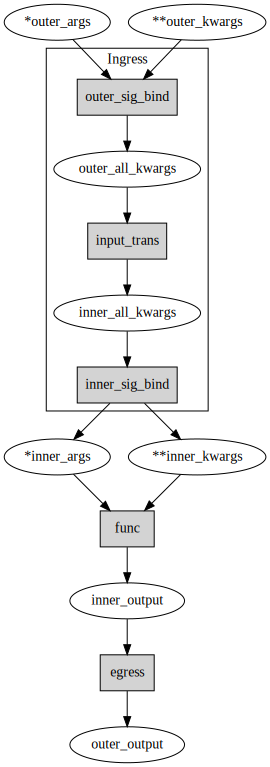

In [10]:
from graphviz import Source

variable_props = 'shape="oval"'
func_props = 'shape="rectangle" style=filled'

Source("""
    digraph G {{

        outer_args -> outer_sig_bind
        outer_kwargs -> outer_sig_bind

        subgraph cluster_1 {{
            color=black
            outer_sig_bind -> outer_all_kwargs
            outer_all_kwargs -> input_trans
            input_trans -> inner_all_kwargs

            inner_all_kwargs -> inner_sig_bind

            label="Ingress"
        }}


    inner_sig_bind -> inner_args
    inner_sig_bind -> inner_kwargs

    inner_args -> func
    inner_kwargs -> func
    func -> inner_output


    inner_output -> egress
    egress -> outer_output

    outer_args [label="*outer_args" {variable_props}]
    outer_kwargs [label="**outer_kwargs" {variable_props}]
    outer_all_kwargs [label="outer_all_kwargs" {variable_props}]
    inner_all_kwargs [label="inner_all_kwargs" {variable_props}]
    inner_args [label="*inner_args" {variable_props}]
    inner_kwargs [label="**inner_kwargs" {variable_props}]

    outer_sig_bind [{func_props}]
    input_trans [{func_props}]
    inner_sig_bind [{func_props}]
    func [{func_props}]
    egress [{func_props}]
    }}""".format(variable_props=variable_props, func_props=func_props)
)

In [11]:
from qo import dgdisp, dot_to_ascii
from i2 import Pipe

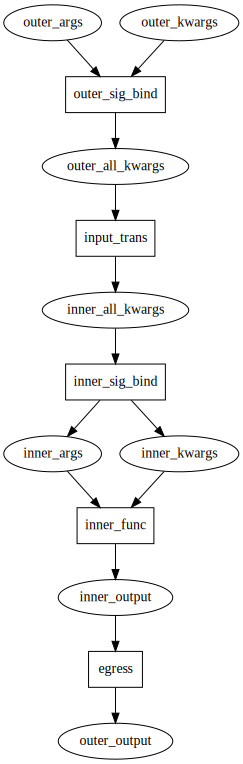

In [12]:
from qo import dgdisp, dot_to_ascii

dgdisp("""
outer_args, outer_kwargs -> [outer_sig_bind] -> outer_all_kwargs -> [input_trans] -> inner_all_kwargs
inner_all_kwargs -> [inner_sig_bind] -> inner_args, inner_kwargs -> [inner_func] -> inner_output
inner_output -> [egress] -> outer_output
""")

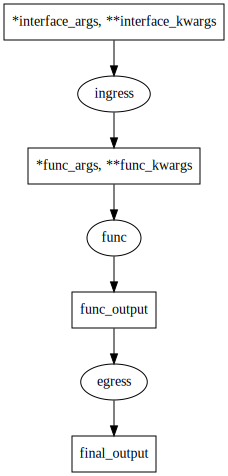

In [13]:
display_func = Pipe(dot_to_ascii, print)
display_func = dgdisp

display_func("""
ingress_input -> ingress
ingress -> ingress_output
ingress_output -> func
func -> func_output
func_output -> egress
egress -> final_output

ingress_input [shape=None]
ingress_output [shape=None]
func_output [shape=None]
final_output [shape=None]
ingress_input [label="*interface_args, **interface_kwargs"]
ingress_output [label="*func_args, **func_kwargs"]
""")

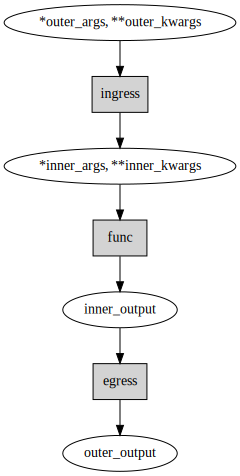

In [14]:
display_func = Pipe(dot_to_ascii, print)
display_func = dgdisp

variable_props = 'shape="oval"'
func_props = 'shape="rectangle" style=filled'

display_func("""
    ingress_input -> ingress
    ingress -> ingress_output
    ingress_output -> func
    func -> func_output
    func_output -> egress
    egress -> final_output

    ingress [{func_props}]
    func [{func_props}]
    egress [{func_props}]

    ingress_input [{variable_props}]
    ingress_output [{variable_props}]
    func_output [label="inner_output" {variable_props}]
    final_output [label="outer_output" {variable_props}]
    ingress_input [label="*outer_args, **outer_kwargs" {variable_props}]
    ingress_output [label="*inner_args, **inner_kwargs" {variable_props}]
    """.format(variable_props=variable_props, func_props=func_props)
             )

In [17]:
import m2r
from qo import ddir
ddir(m2r)

['ArgumentParser',
 'ErrorString',
 'M2R',
 'M2RParser',
 'MdInclude',
 'Namespace',
 'RestBlockGrammar',
 'RestBlockLexer',
 'RestInlineGrammar',
 'RestInlineLexer',
 'RestRenderer',
 'SafeString',
 'column_width',
 'convert',
 'io',
 'main',
 'mistune',
 'nodes',
 'options',
 'os',
 'parse_from_file',
 'parse_options',
 'parser',
 'print_function',
 'prolog',
 're',
 'rst',
 'save_to_file',
 'setup',
 'statemachine',
 'sys',
 'unicode_literals',
 'urlparse',
 'utils']

In [ ]:
m2r.parse_from_file()

In [ ]:
from i2.wrapper import InnerMapIngress, wrap
from inspect import signature


def formula2(w, /, x: float, y=2, *, z: int = 3):
    """Has 3 kinds & every of the 4 combinations of (default y/n, annotated y/n)
    >>> formula2(0, 1, 2)
    '(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'
    """
    return f"(w:={w}) + (x:={x}) * (y:={y}) ** (z:={z}) == {w + x * y ** z}"


f = formula2

assert f(0, 1, 2) == '(w:=0) + (x:=1) * (y:=2) ** (z:=3) == 8'

ingress = InnerMapIngress(f, z=dict(name='zoo'))

assert str(signature(ingress)) == '(w, /, x: float, y=2, *, zoo: int = 3)'
assert ingress(0, 1, 2, zoo=3) == ((0,), {'x': 1, 'y': 2, 'z': 3})

In [ ]:
from inspect import signature

assert str(signature(ingress)) == '(w, /, x: float, y=2, *, zoo: int = 3)'